### 딥러닝

- 뇌의 뉴런과 유사한 머신러닝 알고리즘
- 심층 신경망(DNN, Deep Neural Network)
- 입력층 – 은닉층 – 출력층이 있음

[딥러닝의 학습 과정]

- 순전파: 예측값 계산
- 손실함수: 오차 측정
- 옵티마이저(최적화): 강사 하강법
- 역전파: 가중치 조절
- 
언더피팅과 오버피팅

- train loss (영상의 파란색 곡선): 학습이 진행될수록 감소 -> train dataset에 맞게 모델이 학습되고 있음
-  validation loss (영상의 주황색 곡선): 특정 시점 이후로 증가 -> 오버피팅
- 
에폭(Epoch)

- 데이터 셋을 모두 학습한 상태 (루프 N회)
- 
텐서플로(Tensorflow)

- 2015년 구글 브레인팀에 의해 공개된 머신러닝을 위한 무료 오픈 소스 라이브러리
- 고수준 API 지원 (keras)
- 자동 미분
- 
Sequential 모델

- 레고블럭처럼 원하는 레이어만 불러들여서 쌓게 되면 하나의 딥러닝 모델을 만들 수 있다.

In [1]:
# 라이브러리 불러오기
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# version
tf.__version__

'2.10.0'

In [3]:
# 데이터셋 불러오기
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [4]:
# 데이터 크기
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
# 데이터 확인
import numpy as np
np.set_printoptions(linewidth=120)
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

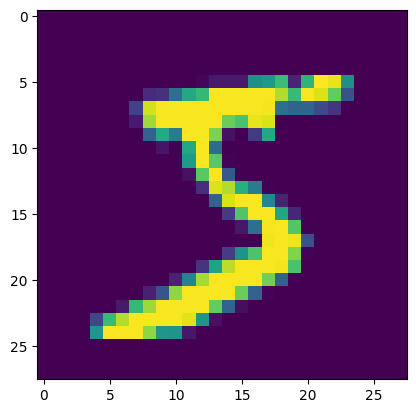

In [6]:
# 데이터 확인(이미지)
plt.imshow(X_train[0])

In [7]:
# label 확인
y_train[0]

5

In [8]:
# 모델
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

Metal device set to: Apple M1


2023-11-25 21:56:32.358481: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-25 21:56:32.360508: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# 학습
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5


2023-11-25 21:57:00.215882: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-11-25 21:57:00.505401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 17s 7ms/step - loss: 2.7832 - accuracy: 0.8957
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3323 - accuracy: 0.9308
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2675 - accuracy: 0.9402
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2438 - accuracy: 0.9436
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2253 - accuracy: 0.9482


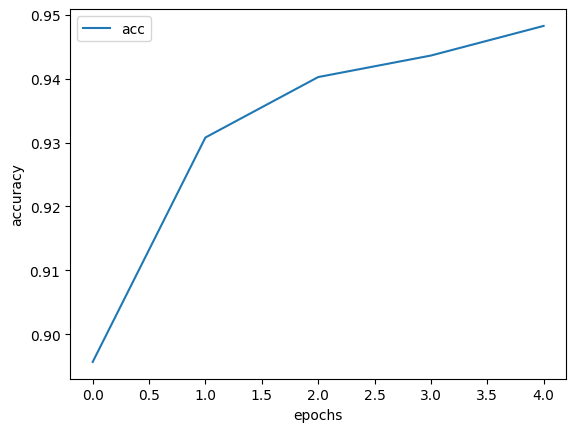

In [12]:
# 학습 정확도 (epoch에 따른 accuracy 변화)
plt.plot(history.history['accuracy'], label='acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

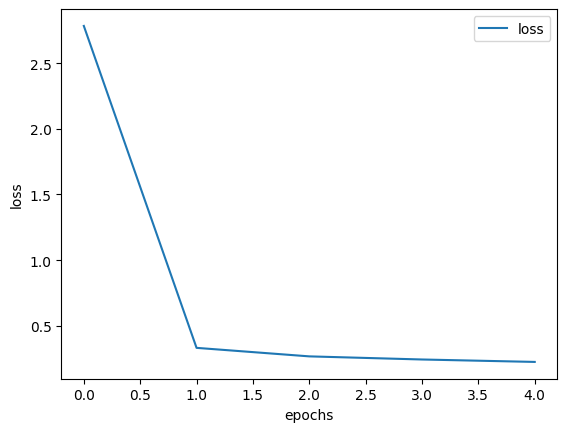

In [13]:
# loss
plt.plot(history.history['loss'], label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### 2. fashion-mnist 데이터

10개 클래스, 그레이, 28x28픽셀
출처 : Fashion-Mnist 데이터

In [14]:
# 라이브러리 불러오기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# 데이터 불러오기 
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [16]:
# 정규화(0~1 사이)
X_train, X_test = X_train / 255.0, X_test / 255.0

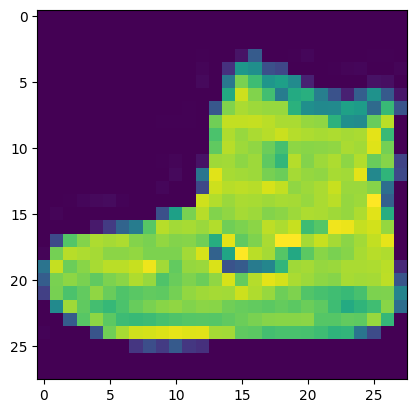

In [17]:
# 데이터 확인(이미지)
plt.imshow(X_train[0])

In [18]:
y_train[0]

9

In [19]:
# label 확인
classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot",
]

print(classes[y_train[0]])

Ankle boot


T-shirt/top


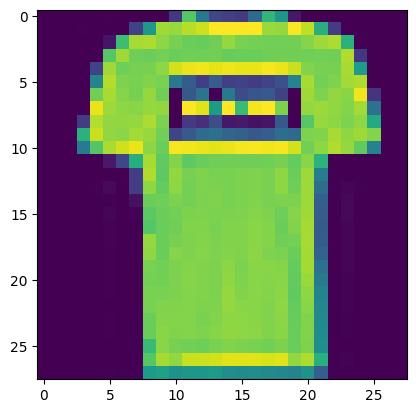

In [20]:
# 데이터 확인(이미지, 레이블)
print(classes[y_train[1]])
plt.imshow(X_train[1])

In [21]:
# 모델
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),    # Dense 레이어에서 연결의 20% 생략 - 오버피팅 방지
    Dense(10, activation='softmax')
])

# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # 원핫일때는 sparse 없앰
              metrics=['accuracy'])

In [22]:
# 학습

# 데이터의 20%를 자동으로 validation data로 지정
# history = model.fit(X_train, y_train, validation_split=0.2, epochs=5)

# 특정 dataset을 validation data로 사용
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10


2023-11-25 22:06:10.963056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.5161 - accuracy: 0.8183

2023-11-25 22:06:27.686107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 20s 10ms/step - loss: 0.5161 - accuracy: 0.8183 - val_loss: 0.4293 - val_accuracy: 0.8465
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3935 - accuracy: 0.8579 - val_loss: 0.4101 - val_accuracy: 0.8500
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3557 - accuracy: 0.8702 - val_loss: 0.3911 - val_accuracy: 0.8620
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3359 - accuracy: 0.8773 - val_loss: 0.3666 - val_accuracy: 0.8633
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3199 - accuracy: 0.8828 - val_loss: 0.3760 - val_accuracy: 0.8681
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3072 - accuracy: 0.8852 - val_loss: 0.3573 - val_accuracy: 0.8691
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2994 - accuracy: 0.8900 - val_loss: 0.3476 - val_accuracy: 0.

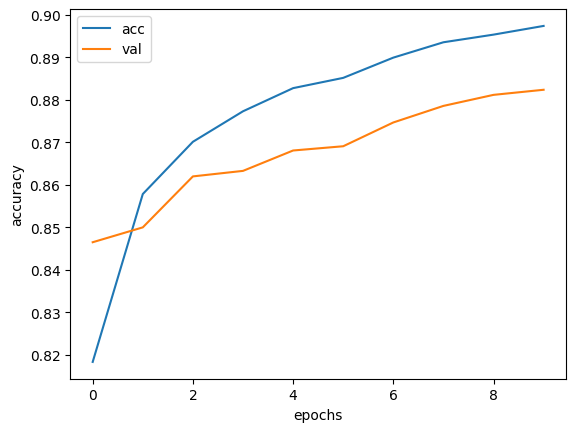

In [23]:
# 학습 정확도
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

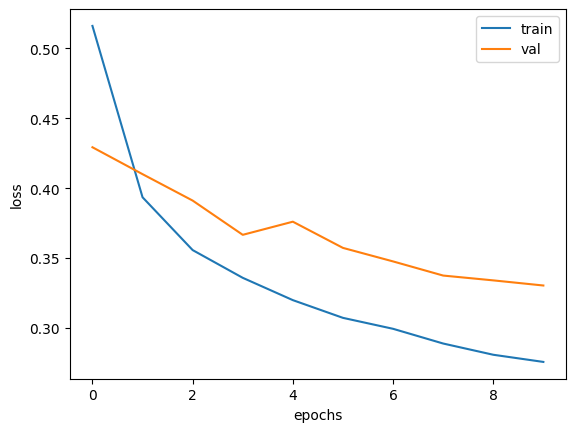

In [24]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [25]:
# 예측
pred = model.predict(X_test)
pred[1]

 31/313 [=>............................] - ETA: 0s  

2023-11-25 22:08:51.187885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


array([1.5594953e-05, 9.6485016e-12, 9.9965620e-01, 1.9240279e-10, 1.2582203e-04, 1.1707239e-12, 2.0231812e-04,
       7.9113281e-19, 2.0338808e-10, 7.0548485e-16], dtype=float32)

In [26]:
np.argmax(pred[1])

2

In [27]:
# 예측한 label
classes[np.argmax(pred[1])]

'Pullover'

In [28]:
# 실제 label
classes[y_test[1]]

'Pullover'

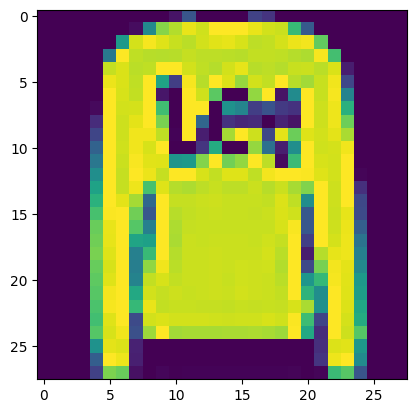

In [29]:
# 이미지 확인
plt.imshow(X_test[1])

### CNN을 활용한 이미지 분류

이번 시간에는 CNN(Convolutional Neural Network)을 활용해서 모델 성능을 올려 보도록 하겠습니다.

이번 시간 정리

CNN(합성곱 신경망 )

시각적 영상을 분석하는 데 사용되는 다층의 피드-포워드적인 인공신경망의 한 종류
합성곱층(Convolution layer)과 풀링층(Pooling layer)으로 구성


In [36]:
# 라이브러리 불러오기
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

# 데이터 불러오기 
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# shape 변경
X_train = X_train.reshape((60000, 28, 28, 1))  # 1 채널 추가
X_test = X_test.reshape((10000, 28, 28, 1))  # 1 채널 추가

# 정규화(0~1 사이)
X_train, X_test = X_train / 255.0, X_test / 255.0

# 모델
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

In [32]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10


2023-11-25 22:22:35.207570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.5857 - accuracy: 0.7876

2023-11-25 22:22:59.725786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 29s 13ms/step - loss: 0.5857 - accuracy: 0.7876 - val_loss: 0.4838 - val_accuracy: 0.8251
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4034 - accuracy: 0.8514 - val_loss: 0.3886 - val_accuracy: 0.8614
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3499 - accuracy: 0.8725 - val_loss: 0.3617 - val_accuracy: 0.8714
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3145 - accuracy: 0.8832 - val_loss: 0.3330 - val_accuracy: 0.8785
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2855 - accuracy: 0.8941 - val_loss: 0.3352 - val_accuracy: 0.8796
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2653 - accuracy: 0.9017 - val_loss: 0.3133 - val_accuracy: 0.8869
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2443 - accuracy: 0.9081 - val_loss: 0.3201 - val_accura

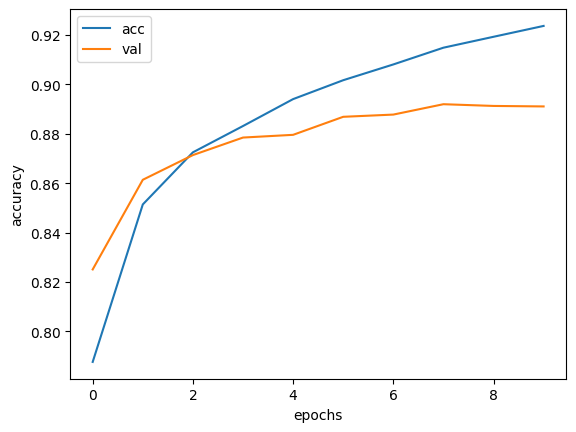

In [33]:
# 학습 정확도
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

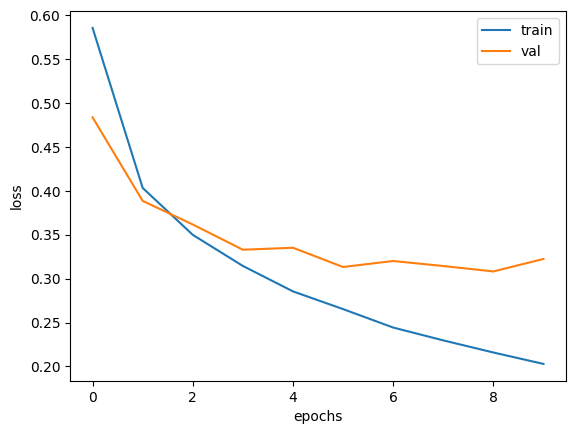

In [34]:
# loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()